# Lab 1 QIC

## Resources

1. NIELSEN, Michael A.; CHUANG, Isaac L. Quantum computation and quantum information.
2. YANOFSKY, Noson S.; MANNUCCI, Mirco A. Quantum computing for computer scientists.
3. Qiskit Learn https://qiskit.org/learn

## Prerequisites

1. python
2. qiskit, qiskit-aer libraries
3. numpy library
4. matplotlib library
5. seaborn library

In [1]:
!pip install qiskit qiskit-aer seaborn numpy matplotlib

  Obtaining dependency information for qiskit from https://files.pythonhosted.org/packages/21/23/51152bd3cfd912b1587dff8c3e3535ab762c336b48898d71bcc1283a1675/qiskit-0.44.2-py3-none-any.whl.metadata
  Obtaining dependency information for qiskit-aer from https://files.pythonhosted.org/packages/ed/d4/b325769bccfcaf3f9f56d794c25070d01e8b8b4b1de379372397e751545f/qiskit_aer-0.12.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for qiskit-terra==0.25.2.1 from https://files.pythonhosted.org/packages/1d/f8/d406545c3d6c9ffca08a049fdc43fab2c8e33b3b33e12ed73b702e3e4786/qiskit_terra-0.25.2.1-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for rustworkx>=0.13.0 from https://files.pythonhosted.org

In [2]:
import qiskit.tools.jupyter
%qiskit_version_table

## Proposed Project Topics

1. Cheng K-W, Tseng C-C. 2002. Quantum plain and carry look-ahead adders. ArXiv. Available at https://arxiv.org/abs/quant-ph/0206028
2. Cuccaro SA, Draper TG, Kutin SA, Moulton DP. 2004. A new quantum ripple-carry addition circuit. ArXiv. Available at https://arxiv.org/abs/quant-ph/0410184.
3. Gepp A, Stocks P. 2009. A review of procedures to evolve quantum algorithms. Genetic Programming and Evolvable Machines 10(2):181–228 DOI 10.1007/s10710-009-9080-7.
4. Kumar S, Kumar TV. 2018. A novel quantum-inspired evolutionary view selection algorithm. Sādhanā 43(10):1–20 DOI 10.1007/s12046-018-0936-5.
5. Kwok J, Pudenz K. 2020. Graph coloring with quantum annealing. Available at https://arxiv.org/ abs/2012.04470.
6. Lahoz-Beltra R. 2016. Quantum genetic algorithms for computer scientists. Computers 5(4):24 DOI 10.3390/computers5040024.
7. Malossini A, Blanzieri E, Calarco T. 2008. Quantum genetic optimization. IEEE Transactions on Evolutionary Computation 12(2):231–241.
8. Moussa C, Calandra H, Humble TS. 2019. Function maximization with dynamic quantum search. In: International Workshop on Quantum Technology and Optimization Problems. Berlin: Springer, 86–95.
9. SaiToh A, Rahimi R, Nakahara M. 2014. A quantum genetic algorithm with quantum crossover and mutation operations. Quantum Information Processing 13(3):737–755 DOI 10.1007/s11128-013-0686-6.


### Other project topics:
1. Come up with your own ideas of using quantum algorithms (Grover's algorithm, Shor's Algorithm, Quantum counting, QKD, Superdense Coding, Quantum Teleportation) for solving real-life problems.
2. Applications that use quantum random number generators (Monte Carlo algorithms, heuristic algorithms, security)

In [3]:
from qiskit import QuantumCircuit, assemble
from qiskit.visualization import plot_histogram, plot_bloch_vector,plot_bloch_multivector
from qiskit.providers.aer import Aer
from math import sqrt, pi
import numpy as np

### Quantum States

### Qubit
$$
\ket{\psi} = \alpha\ket{0}+\beta\ket{1}; \alpha,\beta \in \mathbb{C}
$$

$$
\ket{0} = \begin{bmatrix}
1 \\
0
\end{bmatrix}
$$

and 

$$
\ket{1} = \begin{bmatrix}
0 \\
1
\end{bmatrix}
$$


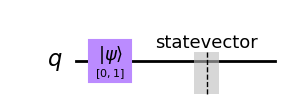

In [4]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.save_statevector()   # Tell simulator to save statevector
qc.draw(output='mpl') 

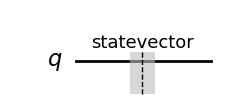

In [16]:
qc = QuantumCircuit(1)
  # Tell simulator to save statevector
#qc.x(0)
qc.save_statevector() 
qc.draw(output='mpl') 

In [17]:
sim = Aer.get_backend('aer_simulator') 
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
result = sim.run(qobj).result() # Do the simulation and return the result
out_state = result.get_statevector()
print(out_state) # Display the output state vector


Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


/tmp/ipykernel_168/4069474290.py:3: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = sim.run(qobj).result() # Do the simulation and return the result


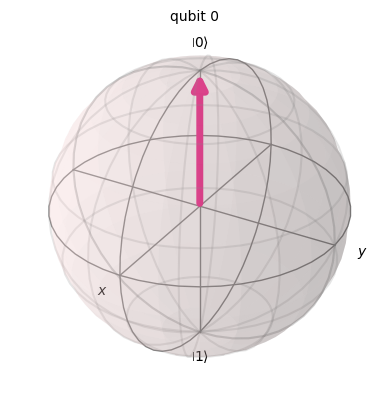

In [18]:
plot_bloch_multivector(out_state)

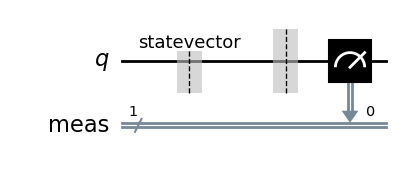

In [19]:
qc.measure_all()
qc.draw(output='mpl')

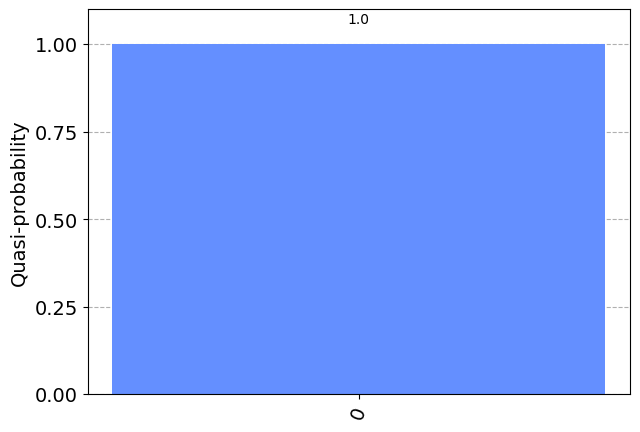

In [20]:
counts = result.get_counts()
plot_histogram(counts)

## Quantum Register

$$
\ket{\psi} = \sum_{i=0}^{2^n-1}\alpha_i\ket{i}, with \sum_{i=0}^{2^{n-1}}|\alpha_{i}|^2 = 1
$$

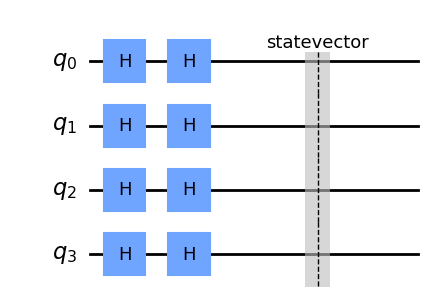

In [41]:
n = 4
qc = QuantumCircuit(n)  # Create a quantum circuit with one qubit
#initial_state = [1/sqrt(2**n),1/sqrt(2**n), 1/sqrt(2**n), 1/sqrt(2**n)]
#qc.initialize(initial_state,qc.qubits) # Apply initialisation operation to the 0th qubit
for i in range(0, n):
    qc.h(i)
for i in range(0, n):
    qc.h(i)    
qc.save_statevector()   # Tell simulator to save statevector
qc.draw(output='mpl') 


/tmp/ipykernel_168/3741341129.py:3: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = sim.run(qobj).result() # Do the simulation and return the result


Statevector([ 1.00000000e+00-2.44929360e-16j,
             -9.81307787e-18+6.12323400e-17j,
              7.49879891e-33+6.12323400e-17j,
             -9.81307787e-18+8.55284707e-49j,
             -3.92523115e-17+6.12323400e-17j,
             -9.81307787e-18+2.29584502e-49j,
             -3.74939946e-33+2.29584502e-49j,
             -9.81307787e-18+3.08148791e-33j,
             -1.11022302e-16+6.12323400e-17j,
             -9.81307787e-18-6.16297582e-33j,
             -3.74939946e-33-6.16297582e-33j,
             -9.81307787e-18+3.08148791e-33j,
             -3.92523115e-17+6.16297582e-33j,
             -9.81307787e-18-2.29584502e-49j,
             -3.42113883e-49-2.29584502e-49j,
             -9.81307787e-18-6.84227766e-49j],
            dims=(2, 2, 2, 2))


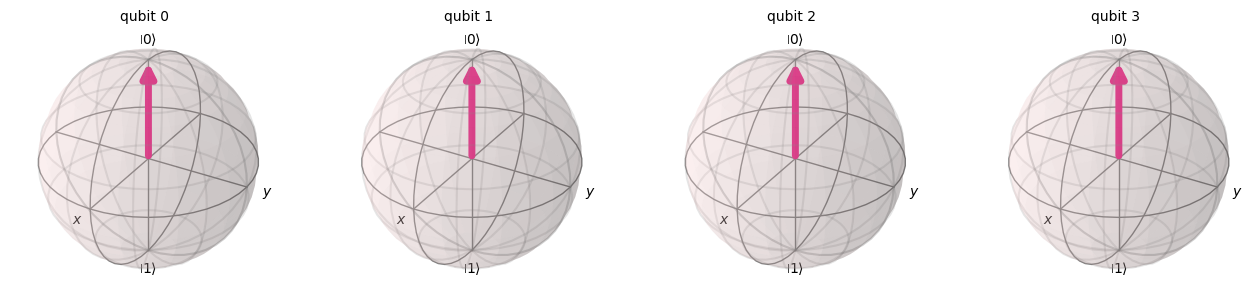

In [42]:
sim = Aer.get_backend('aer_simulator') 
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
result = sim.run(qobj).result() # Do the simulation and return the result
out_state = result.get_statevector()
print(out_state) # Display the output state vector
plot_bloch_multivector(out_state)

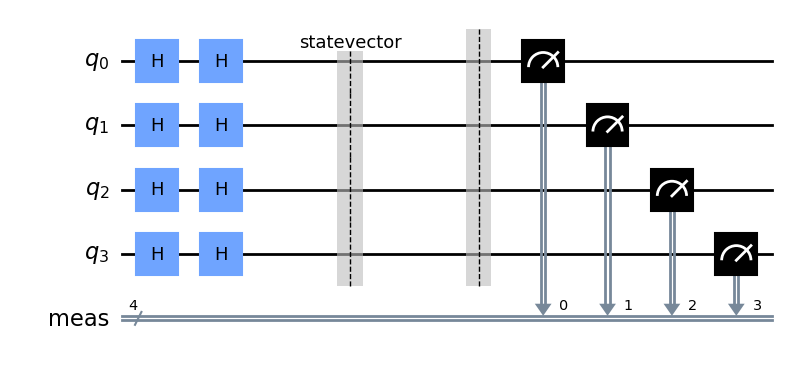

In [43]:
qc.measure_all()
qc.draw(output='mpl')

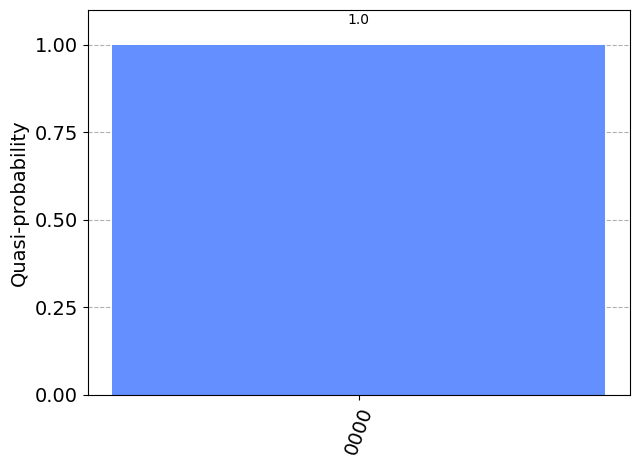

In [44]:
counts = result.get_counts()
plot_histogram(counts)

## Quantum Gates

### The Pauli Gates

#### The Pauli X Gate

$$
X = \begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix} = \ket{0}\bra{1} + \ket{1}\bra{0}
$$

#### The Pauli Y Gate

$$
Y = \begin{bmatrix}
0 & -i \\
i & 0
\end{bmatrix} = -i\ket{0}\bra{1} + i\ket{1}\bra{0}
$$

#### The Pauli Z Gate

$$
Z = \begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix} = \ket{0}\bra{0} - \ket{1}\bra{1}
$$

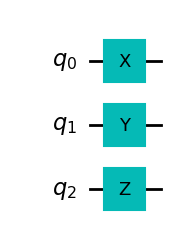

In [33]:
qc = QuantumCircuit(3)
qc.x(0)
qc.y(1)
qc.z(2)
qc.draw(output = "mpl")

/tmp/ipykernel_168/3074831140.py:3: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  state = sim.run(qobj).result().get_statevector()


Statevector([ 0.-0.j,  0.-0.j,  0.+0.j,  0.+1.j,  0.+0.j,  0.+0.j, -0.+0.j,
             -0.+0.j],
            dims=(2, 2, 2))


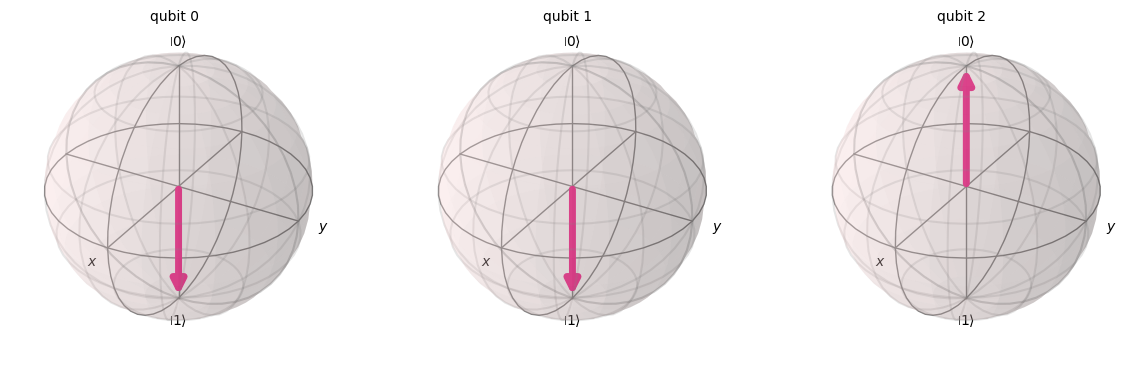

In [34]:
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
print(state)
plot_bloch_multivector(state)

### The Hadamard Gate


$$
H = \frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
$$


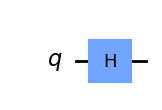

In [35]:
qc = QuantumCircuit(1)
qc.h(0)
qc.draw(output = "mpl")

/tmp/ipykernel_168/3074831140.py:3: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  state = sim.run(qobj).result().get_statevector()


Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


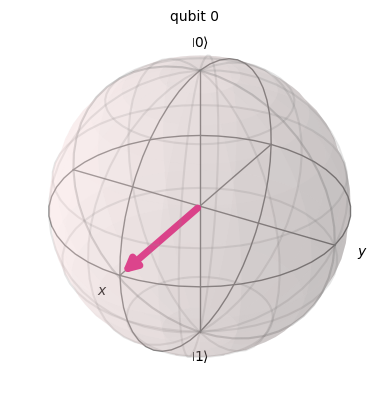

In [36]:
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
print(state)
plot_bloch_multivector(state)

### The CNOT Gate


$$
CNOT = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix}
$$


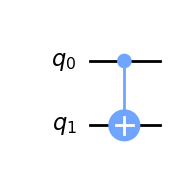

In [45]:
qc = QuantumCircuit(2)
# Apply CNOT
qc.cx(0,1)
# See the circuit:
qc.draw(output="mpl")

## Universal set of quantum gates

According to[1], any unitary transformation can be expressed as a composition of gates. Thus, infinitely many quantum gates can be constructed. A finite set of quantum gates are universal for quantum computation since any unitary transformation may be approximated by a quantum circuit involving only those gates. According to[2] a set of gates $\mathcal{S}$ is universal if any computation in a quantum circuit can be achieved using only gates from the set. Thus, the universal quantum gates set include:

1. The rotation operators $R_x(\theta), R_y(\theta), R_z(\theta)$, the phase-shift gate $P_h(\delta)$ and the $CNOT$ gate.
2. The Clifford set $\{H, S, T, CNOT\}$.
3. The set composed of Toffoli and Hadamard gates.


![Summary quantum gates](./data/gates.png)

## Entanglement

$$
\ket{\rho} = \frac{1}{\sqrt{2}}\ket{01}+\frac{1}{\sqrt{2}}\ket{10}, \neg\exists \ket{x}, \ket{y} s.t. \ket{\rho}=\ket{x}\otimes\ket{y}
$$[Nielsen, M. A., & Chuang, I. L. (2010). Quantum computation and quantum information]

### Bell states

$$
\ket{\beta_{xy}} = \frac{\ket{0,y}+(-1)^x\ket{1,\overline{y}}}{\sqrt{2}}, 
$$
where $\overline{y}$ is the negation of *y*.

$$
\ket{\beta_{00}} = \frac{\ket{00}+\ket{11}}{\sqrt{2}} 
$$

$$
\ket{\beta_{01}} = \frac{\ket{01}+\ket{10}}{\sqrt{2}}
$$

$$
\ket{\beta_{10}} = \frac{\ket{00}-\ket{11}}{\sqrt{2}}
$$

$$
\ket{\beta_{11}} = \frac{\ket{01}-\ket{10}}{\sqrt{2}}
$$

## Cloning impossibility

For $\ket{\psi} = \alpha\ket{0}+\beta\ket{1}, \neg\exists \mathcal{U}, \neg\exists \ket{x} s.t. \mathcal{U}:(\ket{\psi}\otimes\ket{x})=\ket{\psi}\otimes\ket{\psi}$

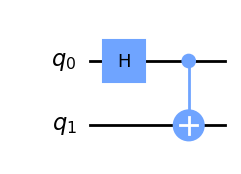

In [46]:
qc = QuantumCircuit(2)
# Apply CNOT
qc.h(0)
qc.cx(0,1)
# See the circuit:
qc.draw(output="mpl")

/tmp/ipykernel_168/3074831140.py:3: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  state = sim.run(qobj).result().get_statevector()


Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


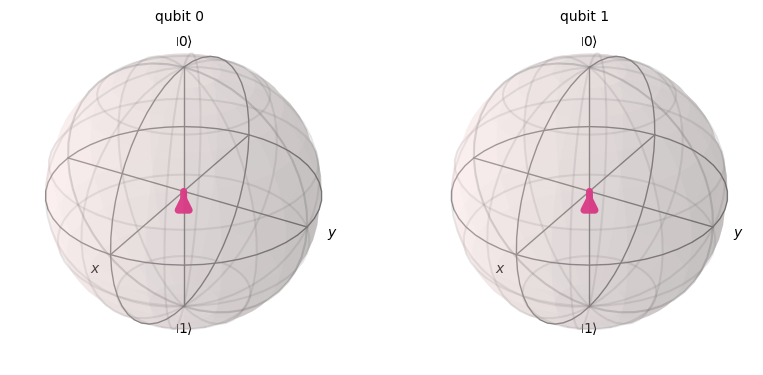

In [47]:
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
print(state)
plot_bloch_multivector(state)

## Bibliography

1. BARENCO, Adriano, et al. Elementary gates for quantum computation. Physical review A, 1995, 52.5: 3457.
2. WILLIAMS, Colin P., et al. Explorations in quantum computing. Santa Clara: Telos, 1998.
41. NIELSEN, Michael A.; CHUANG, Isaac L. Quantum computation and quantum information. Cambridge university press, 2010.